## Import Libraries and Dependencies

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Data Collection and Preprocessing

In [39]:
df = pd.read_csv("IRIS.csv")

In [40]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [42]:
df.shape

(150, 5)

In [43]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Handle Missing Values

In [44]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Data Analysis

In [45]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [47]:
df["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Data Visualization

/home/arul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

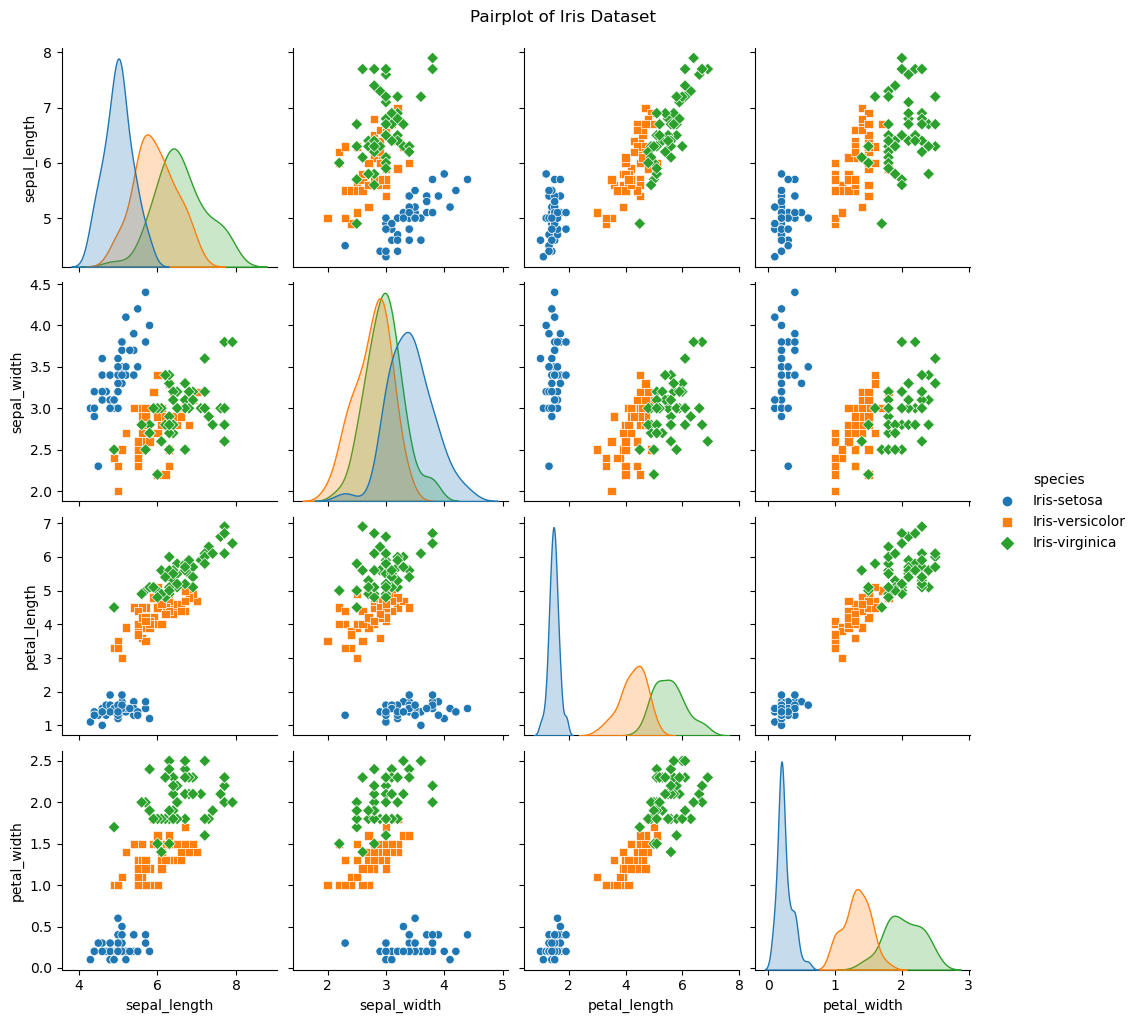

In [48]:
# Pairplot
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

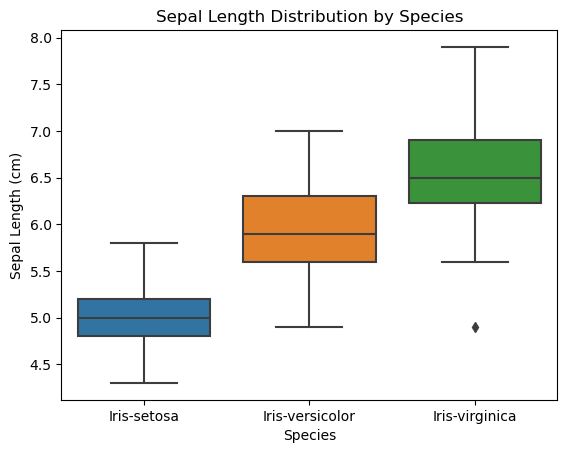

In [49]:
# Sepal Length Distribution by Species
sns.boxplot(x="species", y="sepal_length", data=df)
plt.title("Sepal Length Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length (cm)")
plt.show()

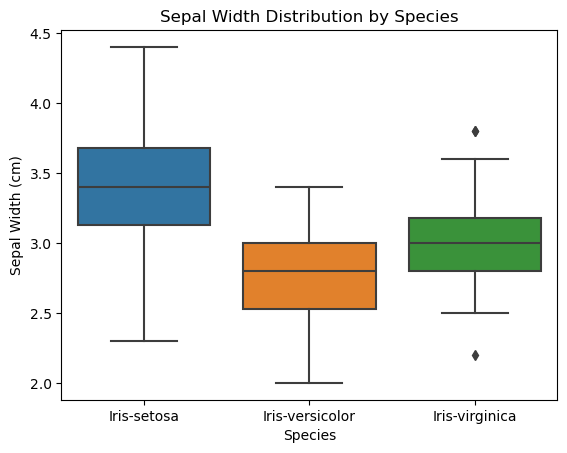

In [50]:
# Sepal Width Distribution by Species
sns.boxplot(x="species", y="sepal_width", data=df)
plt.title("Sepal Width Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Width (cm)")
plt.show()

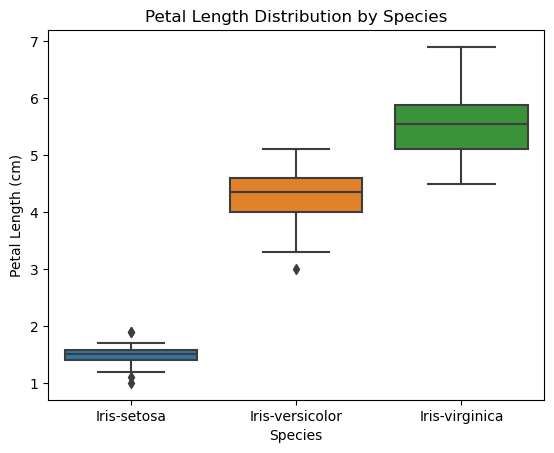

In [51]:
# Petal Length Distribution by Species
sns.boxplot(x="species", y="petal_length", data=df)
plt.title("Petal Length Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.show()

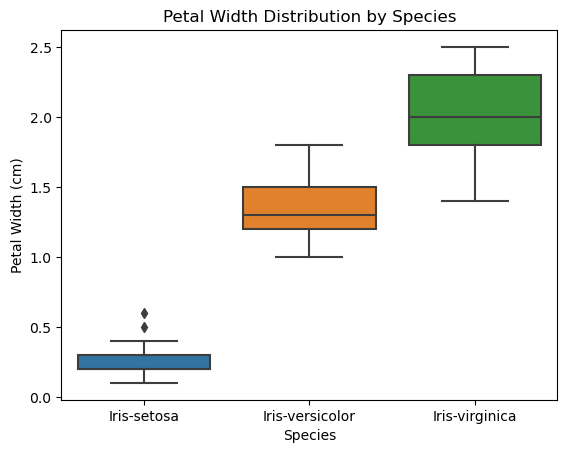

In [52]:
# Petal Width Distribution by Species
sns.boxplot(x="species", y="petal_width", data=df)
plt.title("Petal Width Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Petal Width (cm)")
plt.show()

In [53]:
# Split Data into Features and Labels
X = df.drop(columns=["species"])
y = df["species"]

In [54]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [55]:
# Model 1: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [56]:
# Model Evaluation: Random Forest
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

Accuracy: 0.89

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.78      0.93      0.85        15
 Iris-virginica       0.92      0.73      0.81        15

       accuracy                           0.89        45
      macro avg       0.90      0.89      0.89        45
   weighted avg       0.90      0.89      0.89        45


Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]


In [57]:
# Model 2: Support Vector Machine (SVM)
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [58]:
# Model Evaluation: SVM
print("\nSVM Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, svm_predictions):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, svm_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))


SVM Model Evaluation:
Accuracy: 1.00

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]
